In [12]:
import pandas as pd
import sklearn 
import numpy as np

In [13]:
df = pd.read_csv('Datasets/concrete.csv')
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [14]:
print(" the current dimension of input dataset are : ",df.shape[1])

 the current dimension of input dataset are :  9


In [15]:
#using pcs
from sklearn.decomposition import PCA

In [25]:
pca1 = PCA(n_components=3)
input_3D = pca1.fit_transform(df)
i = pd.DataFrame(input_3D)
i

,0,1,2
0,286.837340,-11.991957,-70.330104
1,285.428599,-16.858783,-82.093422
2,103.630965,182.401143,-91.999387
3,113.213045,189.082839,-103.166922
4,-55.530906,58.918533,-15.500289
...,...,...,...
1025,-22.457816,51.988778,77.808496
1026,32.753471,-51.042528,141.625697
1027,-152.553818,50.821343,48.328466
1028,-131.639706,89.092610,-8.748028


In [26]:
pca1.explained_variance_ratio_

array([0.32491298, 0.24752015, 0.18357202])

Choosing the number of components or dimensions !
1. using cumsum of explained_variance_ratio

In [27]:
pca2 = PCA()
pca2.fit(df)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
print(cumsum)

[0.32491298 0.57243313 0.75600515 0.86300742 0.96344248 0.99538827
 0.99795955 0.99971638 1.        ]


As we can see that our max variance is covered when we have atleast first 5 PCs where it is 0.96.
This implies that the optimal number of components to be chosen should be 5

In [28]:
d = np.argmax(cumsum>=0.95) + 1
d

5

2. by setting the n_components == ratio of explained variance we want

In [24]:
pca3 = PCA(n_components=0.95)
input_reduced = pd.DataFrame(pca3.fit_transform(df))
input_reduced

,0,1,2,3,4
0,286.837340,-11.991957,-70.330104,-13.810676,-56.981280
1,285.428599,-16.858783,-82.093422,-21.562809,-58.723490
2,103.630965,182.401143,-91.999387,90.660378,188.586125
3,113.213045,189.082839,-103.166922,104.615512,278.465281
4,-55.530906,58.918533,-15.500289,-28.359291,322.944795
...,...,...,...,...,...
1025,-22.457816,51.988778,77.808496,65.726073,-21.276073
1026,32.753471,-51.042528,141.625697,109.919149,-10.588849
1027,-152.553818,50.821343,48.328466,59.301845,-6.726311
1028,-131.639706,89.092610,-8.748028,-76.557828,1.193495


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

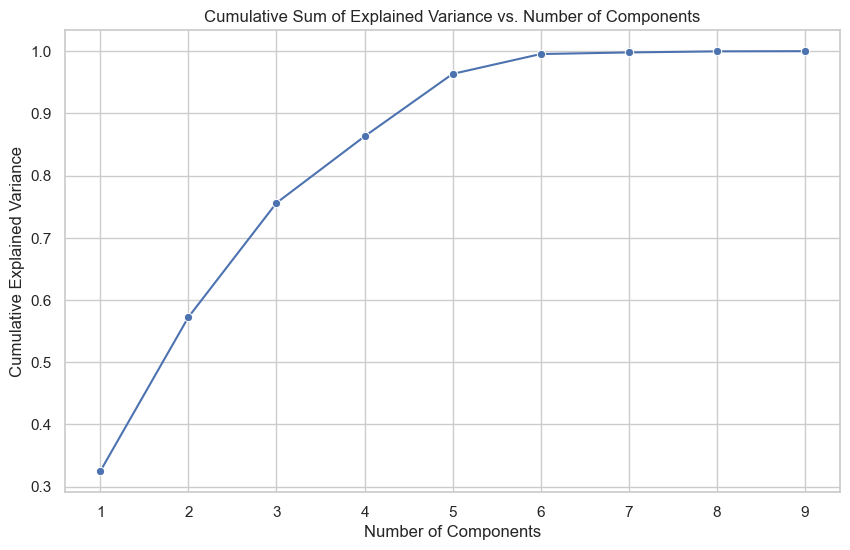

In [38]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, len(cumsum) + 1), y=cumsum, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Sum of Explained Variance vs. Number of Components')
plt.show()